<a href="https://colab.research.google.com/github/SzymonLabedziewski/Metody-Inteligencji-Obliczeniowej/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/MIO"

Mounted at /content/drive
lab02  lab02_fuel.txt


# 1.1
**Proszę stworzyć zestaw punktów należących do dwóch klas: K1 i K2.**

**Punkty z klasy K1 powinny być losowane z rozkładu normalnego o średniej [0, -1] i wariancji 1.**

**Punkty z klasy K2 powinny pochodzić z rozkładu normalnego o średniej [1, 1] i wariancji 1.**

**Całościowo zbiór powinien zawierać 200 punktów, po 100 dla każdej klasy.**

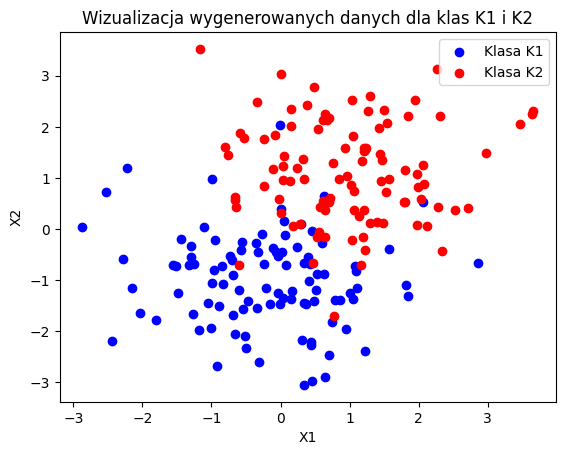

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Liczba punktów na klasę
n_samples = 100

# Generowanie punktów dla klasy K1 (średnia [0, -1], wariancja 1)
k1 = np.random.normal(loc=[0, -1], scale=1, size=(n_samples, 2))

# Generowanie punktów dla klasy K2 (średnia [1, 1], wariancja 1)
k2 = np.random.normal(loc=[1, 1], scale=1, size=(n_samples, 2))

# Wizualizacja zbioru danych
  # legenda
plt.scatter(k1[:, 0], k1[:, 1], color='blue', label='Klasa K1')
plt.scatter(k2[:, 0], k2[:, 1], color='red', label='Klasa K2')
  # osie
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Wizualizacja wygenerowanych danych dla klas K1 i K2")
plt.show()

# Łączenie zbioru danych
X = np.vstack((k1, k2))
Y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# 1.2
**Należy wybrać zbiory uczące o następującej liczebności: 5, 10, 20 oraz 50 (np. losowo, co któryś).**

**Dla każdego wariantu podziału znalezy znaleźć równanie prostej, która najlepiej oddziela klasy K1 i K2.**

**Uzyskaną prostą należy zaprezentować razem z punktami testowymi i linią (hiperpłaszczyzną), która oddziela klasy.**

**Następnie należy ocenić to jak dobrze klasyfikator działa od proporcji danych uczących i testujących**

Dokładność dla zbioru uczącego 5: 0.66
Dokładność dla zbioru uczącego 10: 0.81
Dokładność dla zbioru uczącego 20: 0.92
Dokładność dla zbioru uczącego 50: 0.93


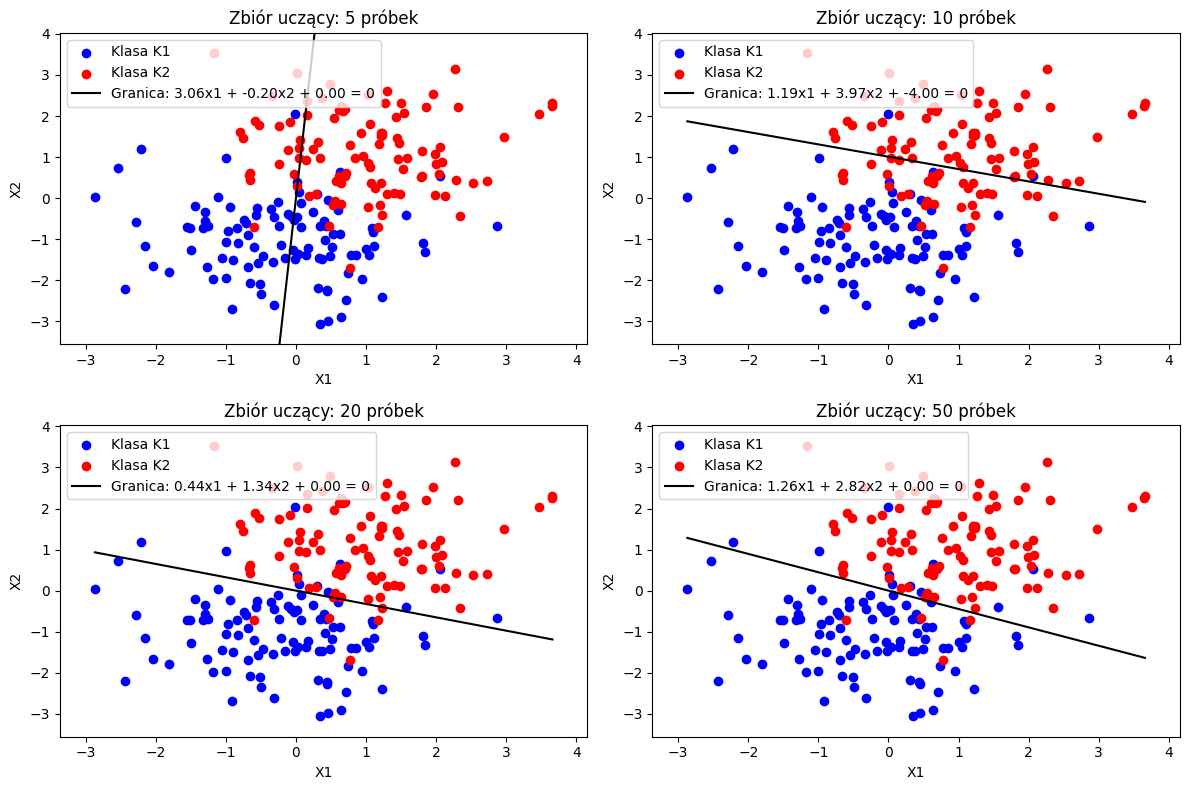

In [2]:


from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Definiowanie różnych rozmiarów zbiorów uczących
training_sizes = [5, 10, 20, 50]

plt.figure(figsize=(12, 8))
for i, size in enumerate(training_sizes, 1):
    # Losowy podział danych
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=size, stratify=Y)

    # Trenowanie perceptronu
    perceptron_1 = Perceptron(tol=1e-3, max_iter=100)
    perceptron_1.fit(X_train, Y_train)

    # Pobranie współczynników modelu
    w1, w2 = perceptron_1.coef_[0]
    b = perceptron_1.intercept_[0]

    # Równanie prostej oddzielającej klasy: w1*x1 + w2*x2 + b = 0
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = -(w1 / w2) * x_vals - (b / w2)

    # Wizualizacja wyników
    plt.subplot(2, 2, i)
    plt.xlim(min(X[:, 0]) - .5, max(X[:, 0]) + .5)
    plt.ylim(min(X[:, 1]) - .5, max(X[:, 1]) + .5)
    plt.scatter(k1[:, 0], k1[:, 1], color='blue', label='Klasa K1')
    plt.scatter(k2[:, 0], k2[:, 1], color='red', label='Klasa K2')
    plt.plot(x_vals, y_vals, label=f'Granica: {w1:.2f}x1 + {w2:.2f}x2 + {b:.2f} = 0', color='black')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"Zbiór uczący: {size} próbek")
    plt.legend()

    # Ocena skuteczności modelu
    accuracy = perceptron_1.score(X_test, Y_test)
    print(f"Dokładność dla zbioru uczącego {size}: {accuracy:.2f}")

plt.tight_layout()
plt.show()

# 2
**Analiza próbek benzyny wykazała że może ona być przypisana do dwóch klas czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1).**

**Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.**

**Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla pięciokrotnego uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.**


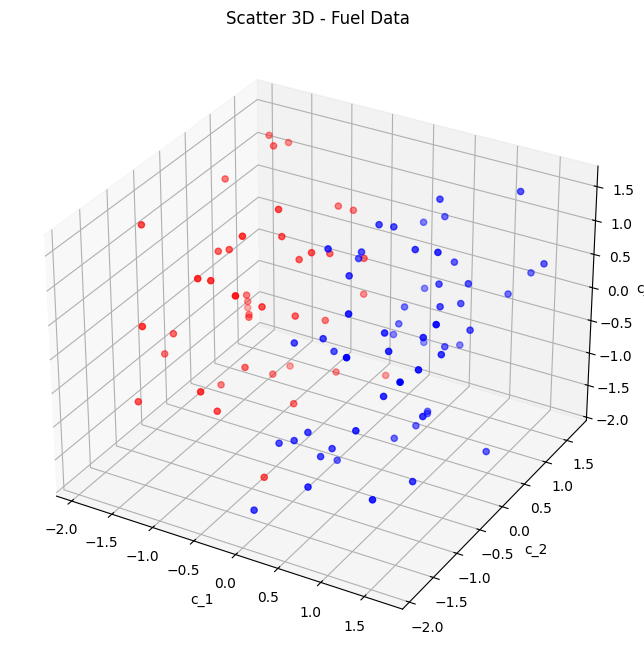

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Wczytanie danych z pliku fuel.txt
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MIO/lab02_fuel.txt")

# Przekształcenie etykiet klas: B -> 0, A -> 1
data['purity_class'] = data['purity_class'].apply(lambda x: 0 if x == 'B' else 1)

# Przygotowanie danych wejściowych / wyjściowych
X = data[['c_1', 'c_2', 'c_3']]
y = data['purity_class']


# Skala danych, aby uzyskać równomierną rozpiętość na osiach
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Przypisanie kolorów do różnych klas
colors = {1: 'r', 0: 'b'}
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y.map(colors), label=y)

# Etykiety osi
ax.set_xlabel('c_1')
ax.set_ylabel('c_2')
ax.set_zlabel('c_3')

# Tytuł wykresu
ax.set_title('Scatter 3D - Fuel Data')

# Wyświetlenie wykresu
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Trenowanie perceptronu i ocena wyników
n_epochs = 5  # Liczba prób uczenia = epok
accuracies = []

for epoch in range(n_epochs):
    # Tworzenie perceptronu
    perceptron_2 = Perceptron(tol=1e-3, max_iter=100)

    # Trenowanie modelu
    perceptron_2.fit(X_scaled, y)

    # Przewidywanie na tych samych danych
    y_pred = perceptron_2.predict(X_scaled)

    # Obliczenie dokładności
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)
    print(f"Dokładność w epoce {epoch + 1}: {accuracy:.2f}")

    # Trening modelu SVM
    svm_model = SVC(kernel='linear')  # Kernel liniowy
    svm_model.fit(X_scaled, y)

    # Parametry modelu (wagi i wyraz wolny)
    w = svm_model.coef_.flatten()  # Wagi
    b = svm_model.intercept_[0]  # Wyraz wolny

    # Wypisanie wzoru płaszczyzny granicy decyzyjnej
    print(f"Równanie granicy decyzyjnej: {w[0]:.4f} * c_1 + {w[1]:.4f} * c_2 + {w[2]:.4f} * c_3 + ({b:.4f}) = 0\n")

# Średnia dokładność po 5 próbach
average_accuracy = np.mean(accuracies)
print(f"Średnia dokładność po 5 próbach: {average_accuracy:.2f}")



Dokładność w epoce 1: 0.97
Równanie granicy decyzyjnej: -3.0532 * c_1 + 0.0317 * c_2 + -0.0531 * c_3 + (-0.6654) = 0

Dokładność w epoce 2: 0.97
Równanie granicy decyzyjnej: -3.0532 * c_1 + 0.0317 * c_2 + -0.0531 * c_3 + (-0.6654) = 0

Dokładność w epoce 3: 0.97
Równanie granicy decyzyjnej: -3.0532 * c_1 + 0.0317 * c_2 + -0.0531 * c_3 + (-0.6654) = 0

Dokładność w epoce 4: 0.97
Równanie granicy decyzyjnej: -3.0532 * c_1 + 0.0317 * c_2 + -0.0531 * c_3 + (-0.6654) = 0

Dokładność w epoce 5: 0.97
Równanie granicy decyzyjnej: -3.0532 * c_1 + 0.0317 * c_2 + -0.0531 * c_3 + (-0.6654) = 0

Średnia dokładność po 5 próbach: 0.97


# 3
**Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris().**

**Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%.**

**Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów.**

**Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu.**

**Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)**

Dokładność modelu: 0.80


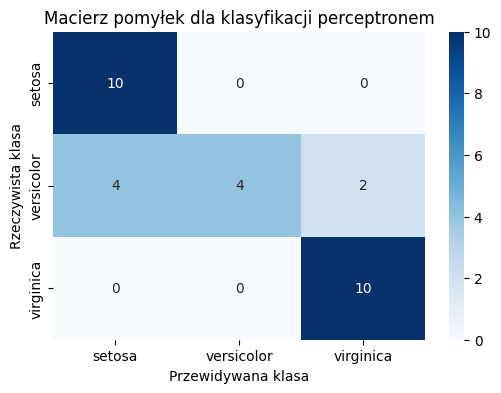

In [10]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Zbiór Iris
data = load_iris()
X = data.data     # cechy (długość/szerokość działek/płatków)
y = data.target   # klasy (gatunki irysów)

# Podział na zbiór uczący (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Trenowanie perceptronu
perceptron_3 = Perceptron(tol=1e-3, max_iter=100)
perceptron_3.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = perceptron_3.predict(X_test)

# Ocena skuteczności
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {accuracy:.2f}")

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Przewidywana klasa")
plt.ylabel("Rzeczywista klasa")
plt.title("Macierz pomyłek dla klasyfikacji perceptronem")
plt.show()


# 4
**Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?**

Podział: 80% treningowe / 20% testowe
Dokładność modelu: 0.80



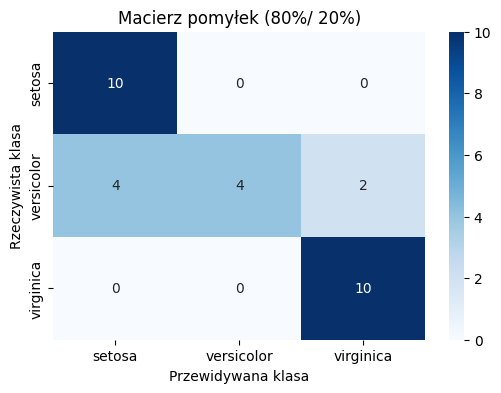



Podział: 70% treningowe / 30% testowe
Dokładność modelu: 0.80



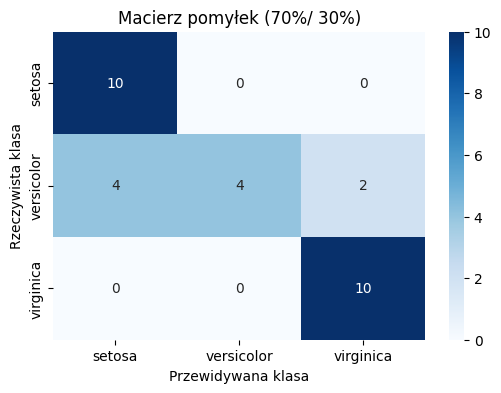



Podział: 60% treningowe / 40% testowe
Dokładność modelu: 0.80



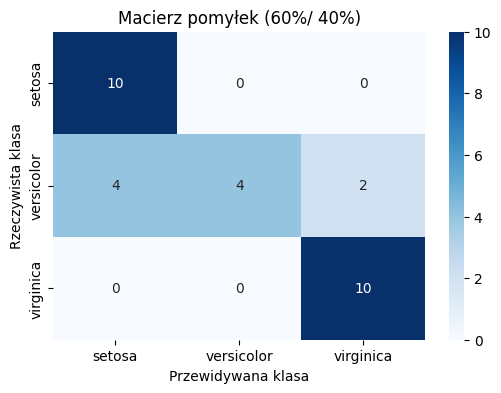



Podział 80%/20% - dokładność: 0.80
Podział 70%/30% - dokładność: 0.80
Podział 60%/40% - dokładność: 0.80


In [11]:

# Różne sposoby podziału danych
split_methods = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]
accuracies = []

for train_size, test_size in split_methods:
    print(f"Podział: {int(train_size * 100)}% treningowe / {int(test_size * 100)}% testowe")

    # Trenowanie perceptronu
    perceptron_4 = Perceptron(tol=1e-3, max_iter=100)
    perceptron_4.fit(X_train, y_train)

    # Przewidywanie na zbiorze testowym
    y_pred = perceptron_4.predict(X_test)

    # Ocena skuteczności
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Dokładność modelu: {accuracy:.2f}\n")

    # Macierz pomyłek
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel("Przewidywana klasa")
    plt.ylabel("Rzeczywista klasa")
    plt.title(f"Macierz pomyłek ({int(train_size * 100)}%/ {int(test_size * 100)}%)")
    plt.show()
    print("\n")

# Podsumowanie wpływu podziału na wynik
for (train_size, test_size), acc in zip(split_methods, accuracies):
    print(f"Podział {int(train_size * 100)}%/{int(test_size * 100)}% - dokładność: {acc:.2f}")


# 5
**Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok).**

**Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False.**

**Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_).**

**Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Epoki: 1,	Dokładność: 0.67,	Faktyczne epoki: 1
Epoki: 2,	Dokładność: 0.80,	Faktyczne epoki: 2
Epoki: 5,	Dokładność: 0.80,	Faktyczne epoki: 5
Epoki: 10,	Dokładność: 0.90,	Faktyczne epoki: 10
Epoki: 20,	Dokładność: 0.60,	Faktyczne epoki: 20
Epoki: 50,	Dokładność: 0.80,	Faktyczne epoki: 21
Epoki: 100,	Dokładność: 0.80,	Faktyczne epoki: 21
Epoki: 200,	Dokładność: 0.80,	Faktyczne epoki: 21


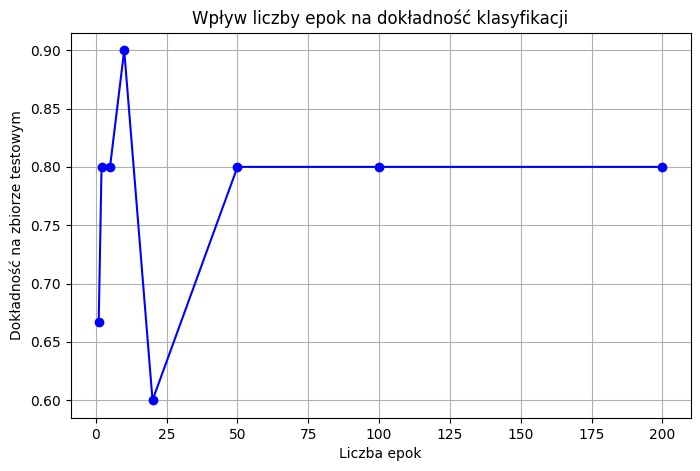

In [12]:

# Lista ilości epok do testowania
epochs_list = [1, 2, 5, 10, 20, 50, 100, 200]
accuracies = []

for epochs in epochs_list:
    # Trenowanie perceptronu z określoną liczbą epok
    perceptron_5 = Perceptron(tol=1e-5, max_iter=epochs, early_stopping=False)
    perceptron_5.fit(X_train, y_train)

    # Przewidywanie na zbiorze testowym
    y_pred = perceptron_5.predict(X_test)

    # Ocena skuteczności
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Epoki: {epochs},\tDokładność: {accuracy:.2f},\tFaktyczne epoki: {perceptron_5.n_iter_}")

# Wizualizacja wyników
plt.figure(figsize=(8, 5))
plt.plot(epochs_list, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Liczba epok")
plt.ylabel("Dokładność na zbiorze testowym")
plt.title("Wpływ liczby epok na dokładność klasyfikacji")
plt.grid()
plt.show()
